# Stroke Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics, model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import textwrap
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output
import plotly.graph_objects as go
import plotly.express as px
import voila
import requests
import io
from io import StringIO
import panel as pn
pn.extension()

## With nearly 800,000 people suffering from stroke per year in the United States, and three in four being first-time stroke patients, stroke is the leading cause of long-term disability (The Importance, 2018). By having the ability to predict stroke, intervention can take place to reduce a patient’s risk of having a stroke, and the life-altering permanent challenges that can come with having a stroke.

In [59]:
# Help Button 
button = widgets.Button(description="Help")
help_output = widgets.Output()

display(button, help_output)

def help_button(b):
    with help_output:
        print("This dashboard is used to show prediction of strokes. Please email tarabentley2016@gmail.com if you have questions or concerns using this product.")

button.on_click(help_button)

Button(description='Help', style=ButtonStyle())

Output()

In [60]:
url = "https://raw.githubusercontent.com/tbentley2016/CapstoneProject2/main/healthcare-dataset-stroke-data.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Exploratory Data Analysis

## This dataset is provided from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset. It is a free, and publiclly available dataset and does not contain any personal information from patients.

## This is a glimpse of the stroke data provided:

In [61]:
# Print portion of the data
display(df)

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

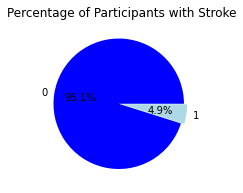

In [62]:
# Visualize the data  
def get_fig():
    plt.figure(figsize=(3,3))
    plt.pie(df['stroke'].value_counts(sort = True),
        explode = (0.05, 0), 
        labels = df['stroke'].value_counts(sort = True).index,
        colors = ["blue","lightblue"], 
        autopct = '%1.1f%%')
    plt.title('Percentage of Participants with Stroke')
    plt.show
get_fig()

# This shows us that 4.9% of respondents had a stroke.

## The dataset shows that 4.9% of respondents had a stroke.

## Visualize each factor's data by selecting a factor from the dropdown menu. This shows the count of each of the entries from the selected factor.

In [63]:
# Help Button 
button_viz = widgets.Button(description="Help")
outputss = widgets.Output()

display(button_viz, outputss)

def viz_button(b):
    with outputss:
        print("Select a factor from the dropdown menu. Scroll over the histogram produced to view the exact numbers within the chart.")
button_viz.on_click(viz_button)

Button(description='Help', style=ButtonStyle())

Output()

In [70]:
# Create interactive plot to visualize each feature within the dataset.
fig = go.Figure()

buttons = []
for col_name in df.columns:
    fig.add_trace(go.Histogram(
        y=df.index,
        x=df[col_name],
        name=col_name,
        visible=False
        )
    )
    
    buttons.append(dict(
        label=col_name,
        method="update",
        args=[{"visible": [col_name==col for col in df.columns]},
        {"title": "Breakdown of Each Feature Within the Dataset"}]))

buttons_list = list(buttons)

fig.update_layout(
    updatemenus=[
        dict(buttons=buttons_list)
    ])


yranges = [0, 5000]

for f in fig.frames:
    if int(f.index) in yranges.keys():
        f.layout.update(yaxis_range = yranges[int(f.index)]) 
                 
fig.show()

In [71]:
# Number of rows and columns
# df.shape

In [72]:
# View the column names, number of entries in each column, and data types
# df.info()

In [73]:
# Calculate the number of null entires within the bmi column
# sum(df.bmi.isnull())

In [74]:
# Use mean imputation to resolve missing data
mean = df.bmi.mean()
df.loc[df['bmi'].isnull(),'bmi'] = mean

In [75]:
# Since the columns for gender, ever_married, work_type, residence_type, and smoking_status
# are categorical rather than numerical, label encoding will assign codes to each distinct entry.
le=preprocessing.LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['smoking_status'] = le.fit(df['smoking_status'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['ever_married'] = le.fit_transform(df['ever_married'])

In [76]:
# Verify that there is no missing data in the new dataframe
# df.info()

In [77]:
# Since the columns for gender, ever_married, work_type, residence_type, and smoking_status
# are categorical rather than numerical, label encoding will assign codes to each distinct entry.
le=preprocessing.LabelEncoder()

In [78]:
df['gender'] = le.fit_transform(df['gender'])
df['smoking_status'] = le.fit(df['smoking_status'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['ever_married'] = le.fit_transform(df['ever_married'])

In [79]:
# Verify that there are no object data types within the dataframe
# df.info()

In [80]:
# Set the target and feature variables
# Seperate the stroke column, as this will be the target variable
X = df.drop(['stroke'], axis=1)
y = df['stroke']

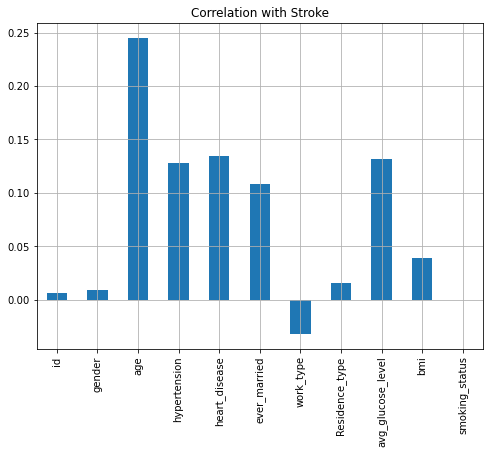

In [132]:
# Now lets visualize how the feature variables correlate with the target variable.
X.corrwith(y).plot(kind='bar', 
                   grid=True, 
                   figsize=(8, 6),
                   title="Correlation with Stroke")
plt.savefig("Correlation_With_Stroke_Histogram.jpg")

In [153]:
%%html
<a href="Correlation_With_Stroke_Histogram.jpg" download="Correlation_With_Stroke_Histogram.jpg">Click to Download Correlation Histogram</a>

## Age, heart_disease, avg_glucose_level, hypertension, and ever_married have the highest correlation with stroke, with age by far having the highest correlation with stroke. Also, id, gender, work_tye, and residence_type have the least correlation. 

<AxesSubplot:>

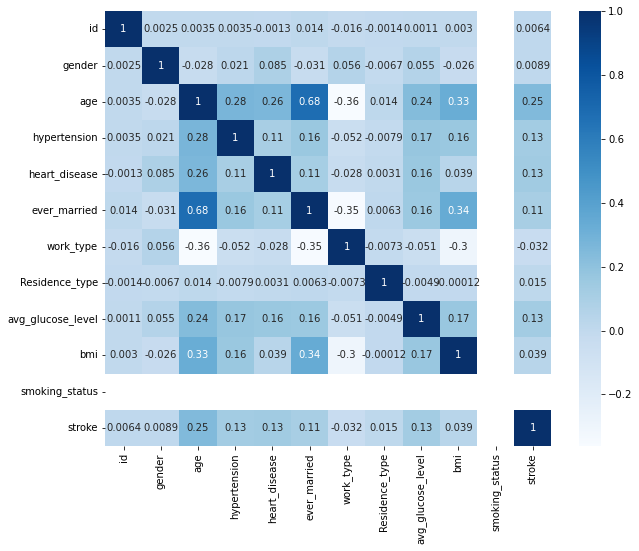

In [154]:
# Another way to visualize the correlation is through a correlation matrix 
plt.figure(figsize=(10,8))
plt.savefig("Dataset_Confusion_Matrix.jpg"),
sns.heatmap(df.corr(), cmap = 'Blues',annot=True)

In [155]:
%%html
<a href="Dataset_Confusion_Matrix.jpg" download="Dataset_Confusion_Matrix.jpg">Click to Download Correlation Heatmap image</a>

In [85]:
# We split the data between 80% training and 20% testing for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [101]:
# Now we can scale the data to remove bias from the model
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

## Modeling

## Select a model by clicking one of the buttons 

In [102]:
# Help Button 
button_mod = widgets.Button(description="Help")
outputs = widgets.Output()

display(button_mod, outputs)

def mod_button(b):
    with outputs:
        print("Choose a classification model by clicking one of the buttons. The accuracy score and confusion matrix. The top left number represents true negatives. The top right shows false positives or type 1 errors. The bottom left shows false negatives or type 2 errors, and the bottom right shows true positives (predicted to have a stroke). To compare accuracy, precision, recall, and F1 scores in one visualization, for all models, click the 'Report All' button.")
button_mod.on_click(mod_button)

Button(description='Help', style=ButtonStyle())

Output()

In [103]:
compare = {}
import warnings
import plotly.graph_objects as px
warnings.filterwarnings('ignore')

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

button1 = widgets.Button(description="K-NN")
output = widgets.Output()
display(button1, output)

def knn_button(b):
    with output:
        knn_clf = KNeighborsClassifier()
        knn_clf.fit(X_train, y_train)
        y_pred_knn = knn_clf.predict(X_test)
        compare['K-NN'] = [accuracy_score(y_test,y_pred_knn), precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn)]
        cm = confusion_matrix(y_test, y_pred_knn)
        sns.heatmap(cm, center=True, fmt='', cmap='Blues', annot=True)
        plt.title(' K-NN Confusion Matrix')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.savefig("K-NN_Confusion_Matrix.jpg")
        plt.show()
        print('K-NN has an accuracy score of %.3f' % accuracy_score(y_test, y_pred_knn))
        
# The k-nearest neighbors model has a 93.8% accuracy and with 1 false positive and 62 false negatives.

button1.on_click(knn_button)

Button(description='K-NN', style=ButtonStyle())

Output()

In [133]:
%%html
<a href="K-NN_Confusion_Matrix.jpg" download="K-NN_Confusion_Matrix.jpg">Click to Download K-NN image</a>

In [106]:
button2 = widgets.Button(description="SVM")
output2 = widgets.Output()
display(button2, output2)

def svm_button(b):
    with output2:
        # We can also apply a support vector machine (SVM) model 
        SVM = SVC(random_state = 0, kernel = 'linear')
        SVM.fit(X_train, y_train)
        y_pred_SVM = SVM.predict(X_test)
        compare['SVM'] = [accuracy_score(y_test, y_pred_SVM), precision_score(y_test, y_pred_SVM), recall_score(y_test, y_pred_SVM), f1_score(y_test, y_pred_SVM)]
        cm = confusion_matrix(y_test, y_pred_SVM)
        sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
        plt.title('SVM Confusion Matrix')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.savefig("SVM_Confusion_Matrix.jpg")
        plt.show()
        print('SVM has an accuracy score of %.3f' % accuracy_score(y_test, y_pred_SVM))
    
button2.on_click(svm_button)

Button(description='SVM', style=ButtonStyle())

Output()

In [109]:
%%html
<a href="SVM_Confusion_Matrix.jpg" download="SVM_Confusion_Matrix.jpg">Click to Download SVM image</a>

In [141]:
button3 = widgets.Button(description="Decision Trees")
output3 = widgets.Output()
display(button3, output3)

def dt_button(b):
    with output3:
# Decision Trees Classifier
        dt = DecisionTreeClassifier(random_state=42)
        dt = dt.fit(X_train, y_train)
        y_pred_dt = dt.predict(X_test)
        compare['Decision Trees'] = [accuracy_score(y_test, y_pred_dt), precision_score(y_test, y_pred_dt), recall_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt)]
        cm = confusion_matrix(y_test, y_pred_dt)
        sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
        plt.title('Decision Trees Confusion Matrix')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.savefig("Decision_Trees_Confusion_Matrix.jpg")
        plt.show()
        print('Decision tree classifier has an accuracy score of %.3f' % accuracy_score(y_test, y_pred_dt))

# Decision tree classifier has a 91.4% accuracy

button3.on_click(dt_button)

Button(description='Decision Trees', style=ButtonStyle())

Output()

In [142]:
%%html
<a href="Decision_Trees_Confusion_Matrix.jpg" download="Decision_Trees_Confusion_Matrix.jpg">Click to Download Decision Trees image</a>

In [136]:
button4 = widgets.Button(description="Logistic Regression")
output4 = widgets.Output()
display(button4, output4)


def log_button(b):
    with output4:
        # Logistic Regression
        log_reg = LogisticRegression(solver = 'liblinear')
        log_reg.fit(X_train, y_train)
        y_pred_log = log_reg.predict(X_test)
        compare['Logistic Regression'] = [accuracy_score(y_test, y_pred_log), precision_score(y_test, y_pred_log), recall_score(y_test, y_pred_log), f1_score(y_test, y_pred_log)]
        cm = confusion_matrix(y_test, y_pred_log)
        sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
        plt.title('Logistic Regression Confusion Matrix')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.savefig("Logigistic_Regression_Confusion_Matrix.jpg")
        plt.show()
        print('Logistic Regression has an accuracy score of %.3f' % accuracy_score(y_test, y_pred_log))

# Logistic Regression has a 91.4% accuracy

button4.on_click(log_button)

Button(description='Logistic Regression', style=ButtonStyle())

Output()

In [143]:
%%html
<a href="Logigistic_Regression_Confusion_Matrix.jpg" download="Logigistic_Regression_Confusion_Matrix.jpg">Click to Download Logistic Regression image</a>

In [138]:
button5 = widgets.Button(description="Random Forest")
output5 = widgets.Output()
display(button5, output5)

def rf_button(b):
    with output5:
        # Random Forest Classifier 
        rf = RandomForestClassifier(n_estimators = 25)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        compare['Random Forest'] = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)]
        cm = confusion_matrix(y_test, y_pred_rf)
        sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
        plt.title('Random Forest Confusion Matrix')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.savefig("Random_Forest_Confusion_Matrix.jpg")
        plt.show()
        print('Random Forest has an accuracy score of  %.3f' % accuracy_score(y_test, y_pred_rf))

# Random forest classifier has a 93.6% accuracy

button5.on_click(rf_button)

Button(description='Random Forest', style=ButtonStyle())

Output()

In [139]:
%%html
<a href="Random_Forest_Confusion_Matrix.jpg" download="Random_Forest_Confusion_Matrix.jpg">Click to Download Random Forest image</a>

In [144]:
button6 = widgets.Button(description="Naive Bayes")
output6 = widgets.Output()
display(button6, output6)

def nb_button(b):
    with output6:
    #Gaussian naive bayes model
        nb = GaussianNB()
        nb.fit = nb.fit(X_train,y_train)
        y_pred_nb = nb.predict(X_test)
        compare['Naive Bayes'] = [accuracy_score(y_test, y_pred_nb), precision_score(y_test, y_pred_nb), recall_score(y_test, y_pred_nb), f1_score(y_test, y_pred_nb)]
        cm = confusion_matrix(y_test, y_pred_nb)
        sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
        plt.title('Naive Bayes Confusion Matrix')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.savefig("Naive_Bayes_Confusion_Matrix.jpg")
        plt.show()
        print('Naive Bayes has an accuracy score of  %.3f' % accuracy_score(y_test, y_pred_nb))
# Gaussian Naive Bayes model has a 87.2% accuracy

button6.on_click(nb_button)

Button(description='Naive Bayes', style=ButtonStyle())

Output()

In [ ]:
%%html
<a href="Random_Forest_Confusion_Matrix.jpg" download="Random_Forest_Confusion_Matrix.jpg">Click to Download Random Forest image</a>

In [127]:
from sklearn.metrics import classification_report

In [145]:
button7 = widgets.Button(description="Bagging")
output7 = widgets.Output()
display(button7, output7)

def bag_button(b):
    with output7:
    # Bagging Classifier
        model = ensemble.BaggingClassifier()
        model.fit(X_train, y_train)
        y_pred_bag = model.predict(X_test) 
        compare['Bagging'] = [accuracy_score(y_test, y_pred_bag) , precision_score(y_test, y_pred_bag), recall_score(y_test, y_pred_bag), f1_score(y_test, y_pred_bag)]
        cm = confusion_matrix(y_test, y_pred_bag)
        sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
        plt.title('Bagging Confusion Matrix')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.savefig("Bagging_Confusion_Matrix.jpg")
        plt.show()
        print('Bagging Classiier has an accuracy score of  %.3f' % accuracy_score(y_test, y_pred_bag))

button7.on_click(bag_button)

Button(description='Bagging', style=ButtonStyle())

Output()

In [146]:
%%html
<a href="Bagging_Confusion_Matrix.jpg" download="Bagging_Confusion_Matrix.jpg">Click to Download Bagging image</a>

In [147]:
button8 = widgets.Button(description="XGBoost")
output8 = widgets.Output()
display(button8, output8)


def xg_button(b):
    with output8:
        model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state=10)
        model.fit(X_train, y_train)
        y_pred_xg = model.predict(X_test)
        compare['XGBoost'] = [accuracy_score(y_test, y_pred_xg), precision_score(y_test, y_pred_xg), recall_score(y_test, y_pred_xg), f1_score(y_test, y_pred_xg)]
        cm = confusion_matrix(y_test, y_pred_xg)
        sns.heatmap(cm, center = True, fmt='', cmap='Blues', annot=True)
        plt.title('XGBoost Confusion Matrix')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.savefig("XGBoost_Confusion_Matrix.jpg")
        plt.show()
        print ('XGBoost has an accuracy score of  %.3f' % accuracy_score(y_test, y_pred_xg))

button8.on_click(xg_button)

Button(description='XGBoost', style=ButtonStyle())

Output()

In [151]:
%%html
<a href="XGBoost_Confusion_Matrix.jpg" download="XGBoost_Confusion_Matrix.jpg">Click to Download XGBoost image</a>

## Compare performance metrics reports for each model

<AxesSubplot:>

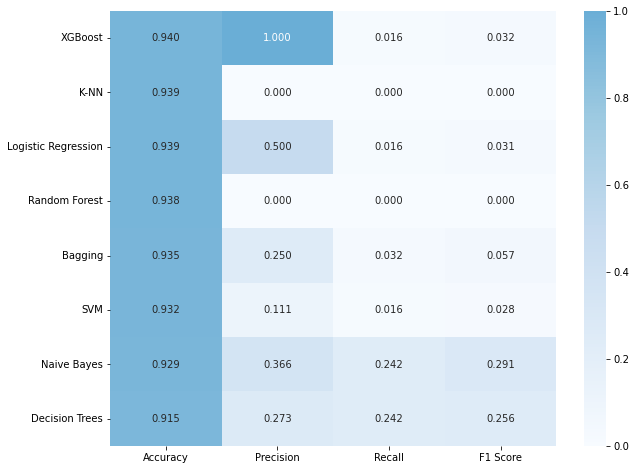

In [157]:
# Modeling Reports
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
compare['K-NN'] = [accuracy_score(y_test,y_pred_knn), precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn)]

# We can also apply a support vector machine (SVM) model 
SVM = SVC(random_state = 0, kernel = 'linear')
SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)
compare['SVM'] = [accuracy_score(y_test, y_pred_SVM), precision_score(y_test, y_pred_SVM), recall_score(y_test, y_pred_SVM), f1_score(y_test, y_pred_SVM)]

# Decision Trees Classifier
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
compare['Decision Trees'] = [accuracy_score(y_test, y_pred_dt), precision_score(y_test, y_pred_dt), recall_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt)]


# Logistic Regression
log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
compare['Logistic Regression'] = [accuracy_score(y_test, y_pred_log), precision_score(y_test, y_pred_log), recall_score(y_test, y_pred_log), f1_score(y_test, y_pred_log)]

# Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 25)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
compare['Random Forest'] = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)]

# Guassian Naive Bayes
nb = GaussianNB()
nb.fit = nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
compare['Naive Bayes'] = [accuracy_score(y_test, y_pred_nb), precision_score(y_test, y_pred_nb), recall_score(y_test, y_pred_nb), f1_score(y_test, y_pred_nb)]

# Bagging
model = ensemble.BaggingClassifier()
model.fit(X_train, y_train)
y_pred_bag = model.predict(X_test) 
compare['Bagging'] = [accuracy_score(y_test, y_pred_bag) , precision_score(y_test, y_pred_bag), recall_score(y_test, y_pred_bag), f1_score(y_test, y_pred_bag)]

# XGBoosting
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state=10)
model.fit(X_train, y_train)
y_pred_xg = model.predict(X_test)
compare['XGBoost'] = [accuracy_score(y_test, y_pred_xg), precision_score(y_test, y_pred_xg), recall_score(y_test, y_pred_xg), f1_score(y_test, y_pred_xg)]

com = pd.DataFrame.from_dict(compare).T
com.columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
com = com.sort_values('Accuracy', ascending=False)
plt.figure(figsize=(10,8))
plt.savefig("Reports.jpg"),
sns.heatmap(com, center = True, fmt='.3f', cmap='Blues', annot=True)
    

In [158]:
%%html
<a href="Reports.jpg" download="Reports.jpg">Click to Download Reports Heatmap image</a>

## Export the reports of all models

In [160]:
# To export the dataframe of perfromance reports shown in the heatmap, 
# the dataframe is saved as a StringIO object that is passed to the widget.

com_rep = StringIO()
com.to_csv(com_rep)
com_rep.seek(0)

pn.widgets.FileDownload(com_rep, 
                        embed=True, 
                        filename='Model_Reporst.csv')



FileDownload(_transfers=1, data='data:text/plain;charset=U..., embed=True, file=<_io.StringIO o..., filename='Model_Reporst.csv', label='Download Model_Reporst.cs...)

# Conclusion
- Age is the main factor which can predict stroke and we recommend special care to prevent stroke for those more at risk (such as also having heart disease or high average glucose level) while growing older. 
- The best performing model for predicting stroke was XGBoost with a 94% accuracy rate and with better false negative and posive rates than the other models considered.

## References:
### The importance of stroke awareness and prevention (2018, May 30). The University of Kansas Health System. https://kutopeka.com/news/importance-stroke-awareness-and-prevention 